In [1]:
# 读取人脸数据库olivettifaces,并存储为pkl文件
import numpy as np
from PIL import Image
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
import xlwt

d:\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 处理gif文件

In [9]:
# 读取原始图片并转换为numpy.ndarray,将灰度值由0-256转换为0-1
img = Image.open('E:/ivy_machine_learning/program/莫烦学习/人脸识别/olivettifaces.gif')   # np.shape(img)=(1140,942)
img_ndarray = np.asarray(img, dtype='float64')/256

#图片大小时1140*942，一共20*20个人脸图，故每张人脸图大小为（1140/20）*（942/20）
#即57*47=2679#将全部400个样本存储为一个400*2679的数组，每一行即代表一个人脸图，
#并且第0～9、10～19、20～29...行分别属于同个人脸#另外，用olivettifaces_label表示
#每一个样本的类别，它是400维的向量，有0～39共40类，代表40个不同的人。
olivettifaces=np.empty((400,2679))  # 返回一个新的空数组
for i in range(20):
    for j in range(20):
        olivettifaces[i*20+j]=np.ndarray.flatten(img_ndarray [i*57:(i+1)*57,j*47:(j+1)*47])
        
olivettifaces_label=np.empty(400)
for label in range(40):
    olivettifaces_label[label*10:label*10+10]=label
olivettifaces_label=olivettifaces_label.astype(np.int)    # olivettifaces_label.shape = [400,1]

######将标签处理成One_hot类型
# label,shape =(400,1)=====>labels,shape =(400,40)
num_labels = olivettifaces_label.shape[0]
num_classes=40
index_offset = np.arange(num_labels) * num_classes
labels_one_hot = np.zeros((num_labels, num_classes))
labels_one_hot.flat[index_offset + olivettifaces_label] = 1
label = labels_one_hot
faces = olivettifaces 
# print(label.shape)


#保存olivettifaces以及olivettifaces_label到olivettifaces.pkl文件
write_file=open('E:/ivy_machine_learning/program/莫烦学习/人脸识别/faces_data.pkl','wb')  
pickle.dump(faces,write_file)  # 将数据存入pickle
pickle.dump(label,write_file) #将标签存入Pickle 
write_file.close() 

In [3]:
olivettifaces_label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [4]:
######将标签处理成One_hot类型
# label,shape =(400,1)=====>labels,shape =(400,40)
num_labels = olivettifaces_label.shape[0]
num_classes=40
index_offset = np.arange(num_labels) * num_classes
labels_one_hot = np.zeros((num_labels, num_classes))
labels_one_hot.flat[index_offset + olivettifaces_label] = 1
# label = labels_one_hot
# print(label.shape)

In [5]:
labels_one_hot.shape

(400, 40)

In [6]:
labels_one_hot[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

## 从olivettifaces.pkl中读取显示单张图片：

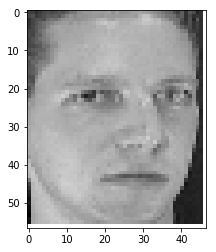

In [10]:
read_file=open('E:/ivy_machine_learning/program/莫烦学习/人脸识别/faces_data.pkl','rb')  
faces=pickle.load(read_file)   # faces.shape = [400,2679] 
label=pickle.load(read_file)  # label.shape=(400,40)
read_file.close() 
img1=np.reshape(faces[1],(57,47))   # 我们将数据集扁平化处理了
plt.imshow(img1,'gray')
# plt.axis('off')
plt.show()

In [17]:
i = 99
# true_label = list(label[i]).index(1)
true_label = np.argmax(label[i])
print(true_label)

9


## 将样本分拆为训练样本、验证样本、测试样本（数据预处理部分）

In [2]:
# 读取olivettifaces.pkl文件，分为训练集（40*8个样本），验证集（40*1个样本），测试集（40*1个样本）
read_file=open('E:/ivy_machine_learning/program/莫烦学习/人脸识别/faces_data.pkl','rb')   
faces=pickle.load(read_file)  # faces.shape=(400,2679)
label=pickle.load(read_file)  # label.shape=(400,40)
read_file.close() 
train_data,test_data, train_label,test_label = train_test_split(faces,label,test_size=0.2,random_state=33, shuffle=True)
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(320, 2679)
(320, 40)
(80, 2679)
(80, 40)


## tensorflow 训练网络

In [3]:
# 我们先设计4层卷积结构
#第一层 2679---1024个神经元，第二层1024---512个神经元，第三层512---128个神经元，第四层是 128----40,Softmax输出层，有 40个神经元，因为我们要识别的数组为0~39，共40个
# 定义各个参数：
def model(X):
    W1 = tf.get_variable('W1',[2679,1024],initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable('b1',[1024],initializer=tf.zeros_initializer())
    W2 = tf.get_variable('W2',[1024,512],initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable('b2',[512],initializer=tf.zeros_initializer())
    W3 = tf.get_variable('W3',[512,128],initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable('b3',[128],initializer=tf.zeros_initializer())
    W4 = tf.get_variable('W4',[128,40],initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.get_variable('b4',[40],initializer=tf.zeros_initializer())

    # 计算网络中间的logits（就是我们常用的Z）、激活值：全部都是全链接的关系
    A1 = tf.nn.relu(tf.matmul(X,W1)+b1,name='A1')   
    A2 = tf.nn.relu(tf.matmul(A1,W2)+b2,name='A2')
    A3 = tf.nn.relu(tf.matmul(A2,W3)+b3,name='A3')
    Z4 = tf.matmul(A3,W4)+b4
    return Z4
def compute_accuracy(v_xs,v_ys):
    global prediction  #将prediction定义为全局变量
    y_pre = sess.run(prediction,feed_dict={X:v_xs})  ##得到1行10列的数据，也就是[1,10]
    correct_prediction = tf.equal(tf.argmax(y_pre,1),tf.argmax(v_ys,1))
    ##取第二维概率最大的（这里索引了最大值的位置），同样标签为最大的值也是我真实的标签值（索引了位置）（我的标签是one_hot类型的）
    ###判断预测和真实标签的index是否一样，一样就代表预测正确，否则就错误
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    result = sess.run(accuracy,feed_dict={X:v_xs,Y:v_ys})
    return result

### 搭建数据流（根据网络结构，定义各参数、变量，并搭建图（graph））-----------------用于训练

In [19]:
# 方法1------------------------trian
# 搭建图-----会话图
# workbook = xlwt.Workbook() 
# sheet = workbook.add_sheet("loss") 
with tf.Graph().as_default():
#     tf.reset_default_graph() # 这个可以不用细究，是为了防止重复定义报错
    ###define placeholder for inputs to network # 给X、Y定义placeholder，要指定数据类型、形状：
    X = tf.placeholder(tf.float32,[None,2679],name='X')  ##57*47，None表示其值大小不定，在这里作为第一个维度值，用以指代batch的大小，意即x的数量不定
    Y = tf.placeholder(tf.float32,[None,40],name='Y')  ##40类输出
    global_steps = tf.Variable(1, trainable=False)
    # 先定义网络-----获得prediction
    prediction = model(X)
    print(prediction.shape)
    # 定义我们的cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=Y))
    # 定义optimizer来minimize cost
    trainer = tf.train.AdamOptimizer().minimize(cost,global_step=global_steps)
    saver = tf.train.Saver()
  
    format_str = "%s    Iteration =  %d   loss = %0.3f"
    with tf.Session() as sess:
        # 首先给所有的变量都初始化（不用管什么意思，反正是一句必须的话）：
        sess.run(tf.global_variables_initializer())

        # 定义一个costs列表，来装迭代过程中的cost，从而好画图分析模型训练进展
        costs = []  

        # 指定迭代次数：
        for it in range(1000+1):
            #############怎么定义batch_size
    #         error:The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, or numpy ndarrays
    #     数据集是feed输入的，feed的数据格式是有要求的。
    # 解决：img,label = sess.run[img,label], 用返回值。
    #         image_batch, label_batch = get_batch_data(train_data,train_label)
    #         image_batch, label_batch = sess.run([image_batch, label_batch])
            # 我们最终需要的是trainer跑起来，并获得cost，所以我们run trainer和cost，同时要把X、Y给feed进去：
    #         _,batch_cost = sess.run([trainer,cost],feed_dict={X:image_batch,Y:label_batch,keep_prob:0.5})
            _,batch_cost = sess.run([trainer,cost],feed_dict={X:train_data,Y:train_label})  #这样写就没有batch_size的概念
#             sheet.write(it, 0, it)
#             loss_new = str(round(batch_cost, 3))
#             sheet.write(it, 1, loss_new)
#             workbook.save('loss_face.xls')

            # 每100个迭代就打印一次cost：
            if it % 20 == 0:
#                 print('iteration%d ,batch_cost: '%it,batch_cost)
                print('loss:',format_str%(datetime.now(),it,batch_cost))
                costs.append(batch_cost)

#             if it % 200 == 0:
#                 checkpoint = 'saver_face/' + 'model.ckpt'
#                 saver.save(sess, checkpoint, global_step=global_steps)  
                
#             if it % 1000 == 0:
#                 write_file=open('E:/ivy_machine_learning/program/莫烦学习/人脸识别/faces_loss1.pkl','wb')  
#                 pickle.dump(costs,write_file)  # 将数据存入pickle
#                 write_file.close() 
        
         ### 训练结束后，看下测试集和训练集上的正确率
        print('test_accuracy:',compute_accuracy(test_data,test_label))
        print('train_accuracy:',compute_accuracy(train_data,train_label))

(?, 40)
loss: 2018-12-07 10:34:35.365665    Iteration =  0   loss = 3.756
loss: 2018-12-07 10:34:36.547820    Iteration =  20   loss = 1.640
loss: 2018-12-07 10:34:37.759684    Iteration =  40   loss = 0.206
loss: 2018-12-07 10:34:39.233617    Iteration =  60   loss = 0.033
loss: 2018-12-07 10:34:40.510794    Iteration =  80   loss = 0.013
loss: 2018-12-07 10:34:41.767091    Iteration =  100   loss = 0.008
loss: 2018-12-07 10:34:43.046158    Iteration =  120   loss = 0.006
loss: 2018-12-07 10:34:44.207084    Iteration =  140   loss = 0.004
loss: 2018-12-07 10:34:45.365107    Iteration =  160   loss = 0.003
loss: 2018-12-07 10:34:46.544724    Iteration =  180   loss = 0.003
loss: 2018-12-07 10:34:47.707027    Iteration =  200   loss = 0.002
loss: 2018-12-07 10:34:49.013351    Iteration =  220   loss = 0.002
loss: 2018-12-07 10:34:50.180942    Iteration =  240   loss = 0.002
loss: 2018-12-07 10:34:51.524367    Iteration =  260   loss = 0.001
loss: 2018-12-07 10:34:52.727219    Iteration 

### 用于测试

INFO:tensorflow:Restoring parameters from saver_face/model.ckpt-1002
Training set accuracy:  1.0
Test set accuracy: 0.95
true_label VS prediction: 23 23
true_label VS prediction: 32 32
true_label VS prediction: 37 37
true_label VS prediction: 9 9
true_label VS prediction: 32 32
true_label VS prediction: 37 37
true_label VS prediction: 9 9
true_label VS prediction: 7 7
true_label VS prediction: 37 37
true_label VS prediction: 9 9
true_label VS prediction: 7 7
true_label VS prediction: 14 14
true_label VS prediction: 9 9
true_label VS prediction: 7 7
true_label VS prediction: 14 14
true_label VS prediction: 32 32


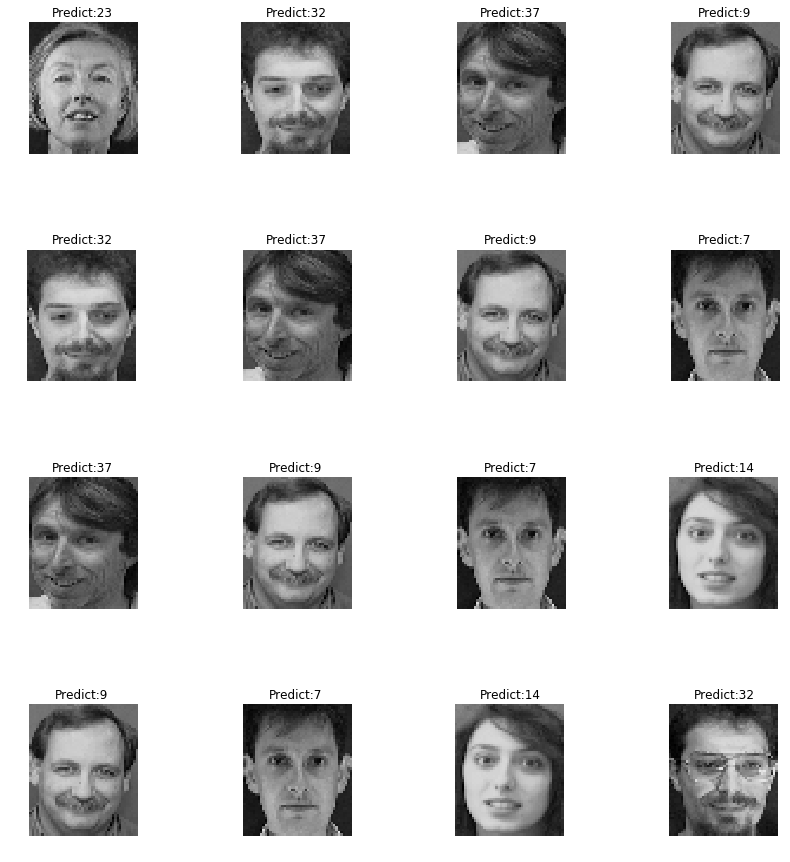

In [5]:
####测试
with tf.Graph().as_default():
    X = tf.placeholder(tf.float32,[None,2679],name='X')  ##57*47，None表示其值大小不定，在这里作为第一个维度值，用以指代batch的大小，意即x的数量不定
    Y = tf.placeholder(tf.float32,[None,40],name='Y')  ##40类输出
    prediction = model(X)
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, 'saver_face/model.ckpt-1002')
        print("Training set accuracy: ",compute_accuracy(train_data,train_label))
        print("Test set accuracy:",compute_accuracy(test_data,test_label))
        pre = sess.run(prediction,feed_dict={X:test_data})
        # 随机从测试集中抽一些图片（比如第i+j张图片），然后取出对应的预测（即z3[i+j]）：
        fig,ax = plt.subplots(4,4,figsize=(15,15))
        fig.subplots_adjust(wspace=0.1, hspace=0.7)
        for i in range(4):
            for j in range(4):
                ax[i,j].imshow(test_data[i+j].reshape(57,47),'gray')
                # 用argmax函数取出z4中最大的数的序号，即为预测结果：
                predicted_num  = np.argmax(pre[i+j]) 
                true_label = np.argmax(test_label[i+j])
                print("true_label VS prediction:",true_label,predicted_num)
                # 这里不能用tf.argmax，因为所有的tf操作都是在图中，没法直接取出来
                ax[i,j].set_title('Predict:'+str(predicted_num))
                ax[i,j].axis('off')
        

## tensorflow训练结束

### 出现的问题
##### 第一个问题，图的建立----利用tf.nn.conv2d()---------------解决(由于一张图片对应一个标签，所以，这里做的是先卷积后全连接做分类)
##### 第二个问题，网络训练完，保存权重，加载权重测试。---------------解决（还是加载ckpt）
##### 第三个问题，怎么完成batch_size的选取------------------------解决(用论文中打乱的方法)

In [30]:
###define placeholder for inputs to network # 给X、Y定义placeholder，要指定数据类型、形状：
X = tf.placeholder(tf.float32,[10,2679],name='X')  ##57*47，None表示其值大小不定，在这里作为第一个维度值，用以指代batch的大小，意即x的数量不定
Y = tf.placeholder(tf.float32,[10,40],name='Y')  ##40类输出
keep_prob = tf.placeholder(tf.float32)  ###定义丢掉率
x_image = tf.reshape(X,[-1,57,47,1])##shape:[n_sample,57,57,1]

In [31]:
# 方法2
def weight_variable(shape):
    inital = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(inital) 
def bias_variable(shape):
    inital = tf.constant(0.1,shape=shape)##初始值为0.1
    return tf.Variable(inital) 
def conv2d(x,W):
    ##strides=[batch,height,width,channel]，所以固定不动Batch和channel,只改变height和width的步长
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')  
def max_pool_2(x):
    ###kszie难道不是指核的大小？？？不是！！！！
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')  

def infrence(x_image):
    ## conv1 layer ##
#     print(x_image.shape)
    W_conv1 = weight_variable([5,5,1,32]) ##patch5*5,in_size=1,out_size=32
    b_conv1 = bias_variable([32])
    conv1 = tf.nn.bias_add(conv2d(x_image,W_conv1),b_conv1)  ##output:57*47*32
    conv1_relu = tf.nn.relu(conv1)   ##output:57*47*32
    conv1_pool = max_pool_2(conv1_relu)  ##output:29*24*32   # 向上取整

    ## conv2 layer ##
    W_conv2 = weight_variable([5,5,32,64]) ##patch5*5,in_size=32,out_size=64
    b_conv2 = bias_variable([64])
    conv2 = tf.nn.bias_add(conv2d(conv1_pool,W_conv2),b_conv2)  ##output:29*24*64
    conv2_relu = tf.nn.relu(conv2)   ##output:29*24*64
    conv2_pool = max_pool_2(conv2_relu)  ##output:15*12*64
#     print(conv2_pool.shape)

    ##func1 layer##
    W_fc1 = weight_variable([15*12*64,1024])
    b_fc1 = bias_variable([1024])
    ##shape[n_sample,7,7,64]-->>[n_sample,7*7*64]
    conv2_pool_flat = tf.reshape(conv2_pool,[-1,15*12*64])
    fc1 = tf.matmul(conv2_pool_flat,W_fc1)+b_fc1
    fc1_relu = tf.nn.relu(fc1)
    fc1_relu_drop = tf.nn.dropout(fc1_relu,keep_prob)

    ##func2 layer##
    W_fc2 = weight_variable([1024,40])
    b_fc2 = bias_variable([40])
    fc2 = tf.matmul(fc1_relu_drop,W_fc2)+b_fc2
    prediction = tf.nn.softmax(fc2)
    return prediction

In [32]:
# 定义我们的cost
logit = infrence(x_image)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit,labels=Y))

# 定义optimizer来minimize cost
trainer = tf.train.AdamOptimizer().minimize(cost)

## 定义next_batch()-----tensorflow有专门的处理程序

In [35]:
def get_batch_data(train_data,train_label):
    train_data = tf.cast(train_data, tf.float32)
    train_label = tf.cast(train_label, tf.float32)
    
    input_queue = tf.train.slice_input_producer([train_data, train_label], shuffle=False)
    image_batch, label_batch = tf.train.batch(input_queue, batch_size=10, num_threads=1, capacity=64)
    return image_batch, label_batch

### 启动会话注入数据

In [12]:
import matplotlib.pyplot as plt
with tf.Session() as sess:
    # 首先给所有的变量都初始化（不用管什么意思，反正是一句必须的话）：
    sess.run(tf.global_variables_initializer())

    # 定义一个costs列表，来装迭代过程中的cost，从而好画图分析模型训练进展
    costs = []
    
    # 指定迭代次数：
    for it in range(1000):
        #############怎么定义batch_size
#         error:The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, or numpy ndarrays
#     数据集是feed输入的，feed的数据格式是有要求的。
# 解决：img,label = sess.run[img,label], 用返回值。
#         image_batch, label_batch = get_batch_data(train_data,train_label)
#         image_batch, label_batch = sess.run([image_batch, label_batch])
        # 我们最终需要的是trainer跑起来，并获得cost，所以我们run trainer和cost，同时要把X、Y给feed进去：
#         _,batch_cost = sess.run([trainer,cost],feed_dict={X:image_batch,Y:label_batch,keep_prob:0.5})
        _,batch_cost = sess.run([trainer,cost],feed_dict={X:train_data,Y:train_label})  #这样写就没有batch_size的概念
        costs.append(batch_cost)

        # 每100个迭代就打印一次cost：
        if it%200 == 0:
            print('iteration%d ,batch_cost: '%it,batch_cost)

        if it % 200 == 0:
            checkpoint = 'saver_face1/' + 'model.ckpt'
            saver.save(sess, checkpoint, global_step=global_steps)         
    # 训练完成，我们来分别看看来训练集和测试集上的准确率：
#     predictions = tf.equal(tf.argmax(tf.transpose(Z4)),tf.argmax(tf.transpose(Y)))
#     accuracy = tf.reduce_mean(tf.cast(predictions,'float'))
#     print("Training set accuracy: ",sess.run(accuracy,feed_dict={X:train_data,Y:train_label}))
#     print("Test set accuracy:",sess.run(accuracy,feed_dict={X:test_data,Y:test_label}))

################训练完以后应该保存权重，然后再测试的时候加载权重

    # ## 随机抽查一些图片，然后输出对应的预测：
    # # 这里改了一点上面的预测集准确率的代码，因为我们需要知道预测结果，所以这里我们单独把Z4的值给取出来，
    # 这样通过分析Z4，即可知道预测值是什么了。
#     z4,acc = sess.run([Z4,accuracy],feed_dict={X:test_data,Y:test_label})
#     print("Test set accuracy:",acc)
    
#     # 随机从测试集中抽一些图片（比如第i+j张图片），然后取出对应的预测（即z3[i+j]）：
#     fig,ax = plt.subplots(4,4,figsize=(15,15))
#     fig.subplots_adjust(wspace=0.1, hspace=0.7)
#     for i in range(4):
#         for j in range(4):
#             ax[i,j].imshow(test_data[i+j].reshape(57,47),'gray')
#             # 用argmax函数取出z4中最大的数的序号，即为预测结果：
#             predicted_num  = np.argmax(z4[i+j]) 
#             true_label = list(test_label[i+j]).index(1)
#             print(true_label)
#             # 这里不能用tf.argmax，因为所有的tf操作都是在图中，没法直接取出来
#             ax[i,j].set_title('Predict:'+str(predicted_num))
#             ax[i,j].axis('off')

iteration0 ,batch_cost:  3.804055
iteration200 ,batch_cost:  0.0020234627
iteration400 ,batch_cost:  0.00045834994
iteration600 ,batch_cost:  0.0001904543
iteration800 ,batch_cost:  0.00010328075


In [12]:
####测试
with tf.Graph().as_default():
    X = tf.placeholder(tf.float32,[None,2679],name='X')  ##57*47，None表示其值大小不定，在这里作为第一个维度值，用以指代batch的大小，意即x的数量不定
    Y = tf.placeholder(tf.float32,[None,40],name='Y')  ##40类输出
    prediction = model(X)
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, 'saver_face1/model.ckpt-802')
#         #         训练完成，我们来分别看看来训练集和测试集上的准确率：
#         predictions = tf.equal(tf.argmax(tf.transpose(Z4)),tf.argmax(tf.transpose(Y)))
#         accuracy = tf.reduce_mean(tf.cast(predictions,tf.float32))
        print("Training set accuracy: ",compute_accuracy(train_data,train_label))
        print("Test set accuracy:",compute_accuracy(test_data,test_label))

INFO:tensorflow:Restoring parameters from saver_face1/model.ckpt-802
Training set accuracy:  1.0
Test set accuracy: 0.925


## 将标签转为one-hot类型----学习例子

In [5]:
# 先学习一个转为one-hot的写法
import numpy as np
labels_exe=np.asarray([0,4,2,3,2,0]) 
num_labels = labels_exe.shape[0]
print(num_labels)
num_classes=5
index_offset = np.arange(num_labels) * num_classes
print(index_offset)
one_hot = np.zeros((num_labels, num_classes))
print([index_offset + labels_exe])
# one_hot.flat[index_offset + labels_exe] = 1
# print (one_hot)

6
[ 0  5 10 15 20 25]
[array([ 0,  9, 12, 18, 22, 25])]


In [9]:
index_offset.shape

(6,)

In [10]:
labels_exe.shape

(6,)

In [8]:
(index_offset + labels_exe).shape

(6,)

In [12]:
one_hot.flat[index_offset + labels_exe] = 1

In [13]:
one_hot

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [16]:
a = np.zeros((2,5))
a.flat[0,9] = 1

IndexError: unsupported iterator index

In [15]:
a

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

## 将one_hot变为label数字标签

In [10]:
b = np.argmax(one_hot,1)

In [11]:
b

array([0, 4, 2, 3, 2, 0], dtype=int64)

In [8]:
a=list(one_hot[1])

In [9]:
label1 = a.index(1) 

In [49]:
label1

4

In [36]:
import tensorflow as tf
one_hot=tf.one_hot(labels_exe,5)

In [37]:
one_hot

<tf.Tensor 'one_hot:0' shape=(6, 5) dtype=float32>

In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    print(sess.run(one_hot))

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [56]:
import math
H = 57
S1 = 2
out_height=math.ceil (H /S1 ) 

In [57]:
out_height

29

In [58]:
57/2

28.5

In [59]:
47/2

23.5

In [60]:
29/2

14.5